   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0     

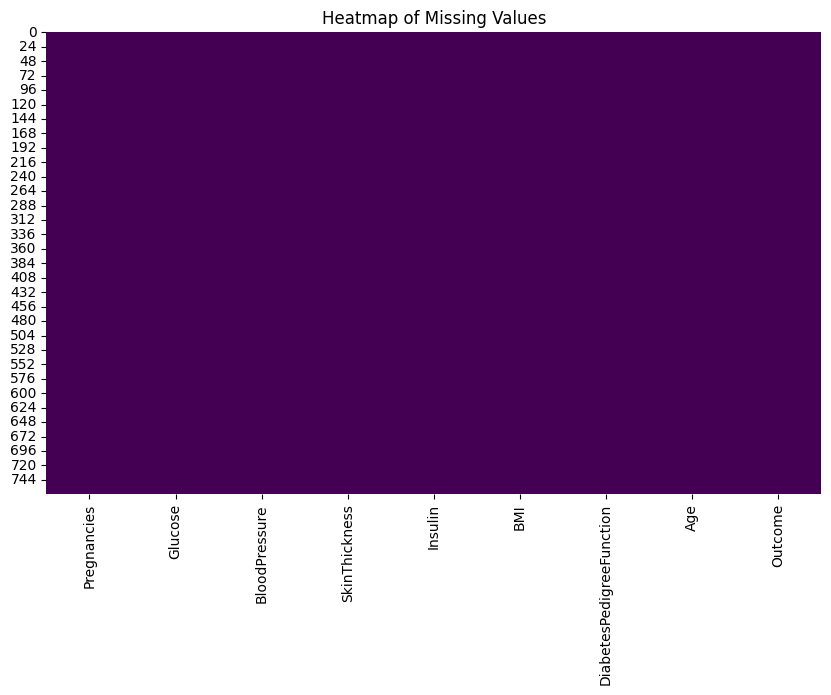

Missing values in each column before handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values in each column after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Cleaned dataset saved to 'cleaned_dataset.csv'.
Feature matrix (X) shape: (768, 8)
Target variable (y) shape: (768,)

Train-Test Split Shapes:
X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)
Accuracy of KNN (k=3): 0.70


In [16]:
#Problem 1
#Load the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/jupyter/diabetes.csv')
print(df.head())
import pandas as pd

print("First 5 rows of the dataset:")
print(df.head())

print("\nData types and non-null counts:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nSummary statistics for numerical columns:")
print(df.describe())

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("\nSummary statistics for categorical columns:")
    print(df[categorical_columns].describe())
else:
    print("\nNo categorical columns found.")

if 'target' in df.columns:
    print("\nDistribution of the target variable:")
    print(df['target'].value_counts())

try:
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Heatmap of Missing Values")
    plt.show()
except ImportError:
    print("\nSeaborn and matplotlib are required for visualizing missing values.")


#Handle Missing Data
print("Missing values in each column before handling:")
print(df.isnull().sum())

if 'target' in df.columns:
    df = df.dropna(subset=['target'])

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values in each column after handling:")
print(df.isnull().sum())

df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved to 'cleaned_dataset.csv'.")



#Feature Engineering
df = pd.read_csv('/content/drive/MyDrive/jupyter/diabetes.csv')

target_column = 'Outcome'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Feature matrix (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

random_seed = 42
np.random.seed(random_seed)

shuffled_indices = np.random.permutation(len(X))
split_index = int(len(X) * 0.7)

train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

print("\nTrain-Test Split Shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


#KNN
def compute_distances(X_train, query_point):
    distances = ((X_train - query_point) ** 2).sum(axis=1).pow(0.5)
    return distances

def predict_single(X_train, y_train, query_point, k=3):
    distances = compute_distances(X_train, query_point)
    neighbors = pd.DataFrame({'distance': distances, 'label': y_train})
    top_k = neighbors.nsmallest(k, 'distance')
    predicted_class = top_k['label'].mode()[0]
    return predicted_class

def predict(X_train, y_train, X_test, k=3):
    predictions = X_test.apply(lambda query_point: predict_single(X_train, y_train, query_point, k), axis=1)
    return predictions

def calculate_accuracy(y_true, y_pred):
    correct_predictions = (y_true == y_pred).sum()
    accuracy = correct_predictions / len(y_true)
    return accuracy

k = 3
y_pred = predict(X_train, y_train, X_test, k)

accuracy = calculate_accuracy(y_test, y_pred)
print(f"Accuracy of KNN (k={k}): {accuracy:.2f}")


In [18]:
#PROBELM 2
#Code for Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("\nScaled Feature Matrix (First 5 rows):")
print(X_train_scaled.head())


#Code for Training and Testing with Scaled Data

k = 3
y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)

accuracy_scaled = calculate_accuracy(y_test, y_pred_scaled)
print(f"Accuracy of KNN on Scaled Data (k={k}): {accuracy_scaled:.2f}")


#Performance Comparison
accuracy_original = accuracy

print("\nComparative Analysis:")
print(f"Accuracy on Original Data: {accuracy_original:.2f}")
print(f"Accuracy on Scaled Data: {accuracy_scaled:.2f}")



Scaled Feature Matrix (First 5 rows):
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
668     0.641921 -0.712686      -0.534777       0.782915  0.930433  0.234331   
324    -0.541638 -0.279438       0.298467       0.720924 -0.698631  0.440560   
624    -0.541638 -0.403223      -0.240691      -1.262799 -0.698631 -0.153864   
690     1.233701 -0.434170       0.543539      -1.262799 -0.698631 -0.905993   
473     0.937811  0.463272       1.033683      -1.262799 -0.698631 -0.263044   

     DiabetesPedigreeFunction       Age  
668                 -0.126769  0.811249  
324                 -0.967498 -1.055177  
624                 -0.937685 -1.055177  
690                  1.143267  0.047711  
473                 -0.782657  1.405112  
Accuracy of KNN on Scaled Data (k=3): 0.70

Comparative Analysis:
Accuracy on Original Data: 0.70
Accuracy on Scaled Data: 0.70



Results for Original Dataset:
     k  accuracy      time
0    1  0.649351  4.619229
1    2  0.714286  3.468392
2    3  0.701299  3.786865
3    4  0.748918  2.837602
4    5  0.714286  1.638358
5    6  0.761905  0.882502
6    7  0.731602  1.040814
7    8  0.748918  1.147255
8    9  0.744589  1.151208
9   10  0.735931  0.898331
10  11  0.727273  0.903939
11  12  0.731602  0.969712
12  13  0.740260  0.925300
13  14  0.748918  0.939120
14  15  0.735931  1.195390

Results for Scaled Dataset:
     k  accuracy      time
0    1  0.714286  2.937065
1    2  0.714286  2.494616
2    3  0.696970  2.649562
3    4  0.727273  1.776460
4    5  0.735931  0.770926
5    6  0.744589  0.760283
6    7  0.748918  1.075269
7    8  0.753247  1.106120
8    9  0.727273  0.755573
9   10  0.718615  0.772861
10  11  0.718615  0.878884
11  12  0.731602  0.813728
12  13  0.731602  0.832203
13  14  0.735931  0.768324
14  15  0.731602  1.082154


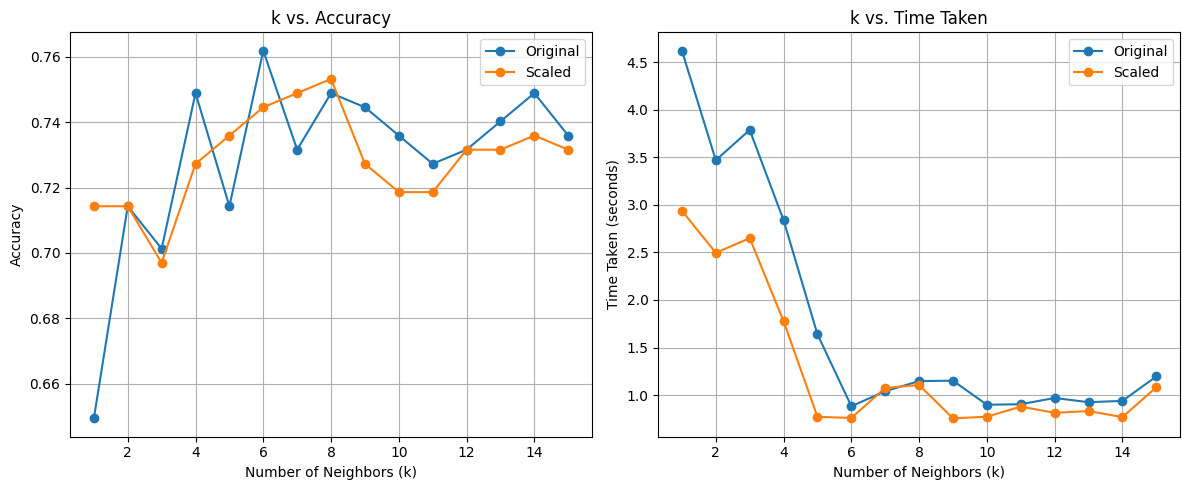

In [19]:
import time
import matplotlib.pyplot as plt


results_original = {'k': [], 'accuracy': [], 'time': []}
results_scaled = {'k': [], 'accuracy': [], 'time': []}


k_values = range(1, 16)

for k in k_values:
    # Record for original dataset
    start_time = time.time()
    y_pred_original = predict(X_train, y_train, X_test, k)
    time_taken = time.time() - start_time
    accuracy_original = calculate_accuracy(y_test, y_pred_original)

    results_original['k'].append(k)
    results_original['accuracy'].append(accuracy_original)
    results_original['time'].append(time_taken)

    # Record for scaled dataset
    start_time = time.time()
    y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)
    time_taken = time.time() - start_time
    accuracy_scaled = calculate_accuracy(y_test, y_pred_scaled)

    results_scaled['k'].append(k)
    results_scaled['accuracy'].append(accuracy_scaled)
    results_scaled['time'].append(time_taken)

# Convert results to DataFrames for easier analysis
df_original = pd.DataFrame(results_original)
df_scaled = pd.DataFrame(results_scaled)

# Display results
print("\nResults for Original Dataset:")
print(df_original)
print("\nResults for Scaled Dataset:")
print(df_scaled)



# Plot k vs. Accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(df_original['k'], df_original['accuracy'], label='Original', marker='o')
plt.plot(df_scaled['k'], df_scaled['accuracy'], label='Scaled', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Time Plot
plt.subplot(1, 2, 2)
plt.plot(df_original['k'], df_original['time'], label='Original', marker='o')
plt.plot(df_scaled['k'], df_scaled['time'], label='Scaled', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
